In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import joblib
print("library imported")

library imported


In [2]:
# Load the dataset
data = pd.read_csv("./data/EcoPreprocessed.csv")

In [3]:
data.head()

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive


In [4]:
null_columns = data.isnull().any()
print(null_columns)

Unnamed: 0    False
review        False
polarity      False
division      False
dtype: bool


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["review"], data["division"], test_size=0.2, random_state=42)

In [6]:

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  

# Fit and transform the training text data
X_train_vectorized = vectorizer.fit_transform(X_train)


In [7]:
# Initialize and train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)



MultinomialNB()

In [8]:
# Transform the test text data
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

In [9]:

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy is: {accuracy}")

# Save the model and vectorizer
joblib.dump(nb_classifier, "Sentiment_Model_CountVectorizer.pkl")
joblib.dump(vectorizer, "CountVectorizer.pkl")

The accuracy is: 0.7637698898408812


['CountVectorizer.pkl']

In [10]:
# making inputs 
input_text = "hello world"

# Convert input into vector
input_vector = vectorizer.transform([input_text])

# Predict probabilities for each class (positive, negative, neutral)
predicted_probabilities = nb_classifier.predict_proba(input_vector)[0]

# Get the class labels
class_labels = nb_classifier.classes_

# Create a dictionary to map class labels to sentiments
sentiment_mapping = {
    "positive": "Positive",
    "negative": "Negative",
    "neutral": "Neutral"
}

# Print the probabilities for each sentiment
for label, prob in zip(class_labels, predicted_probabilities):
    sentiment = sentiment_mapping.get(label, "Unknown")
    print(f"{sentiment}: {prob:.4f}")

Negative: 0.0766
Neutral: 0.0585
Positive: 0.8650


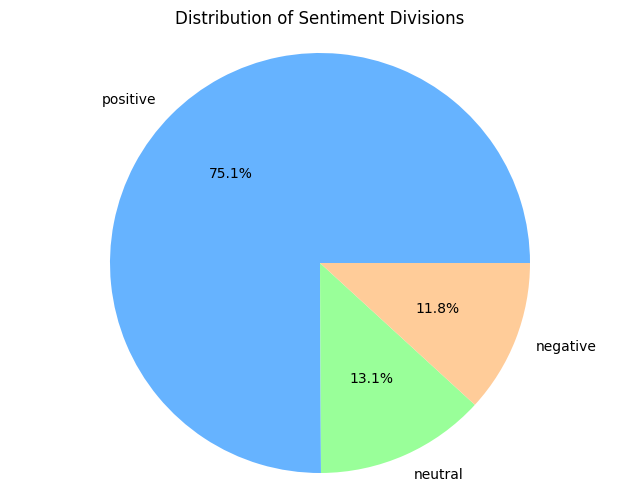

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe from the provided data
data = pd.read_csv("./data/EcoPreprocessed.csv")

# Count the occurrences of each category
division_counts = data['division'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(division_counts, labels=division_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Sentiment Divisions')
plt.axis('equal')
plt.show()


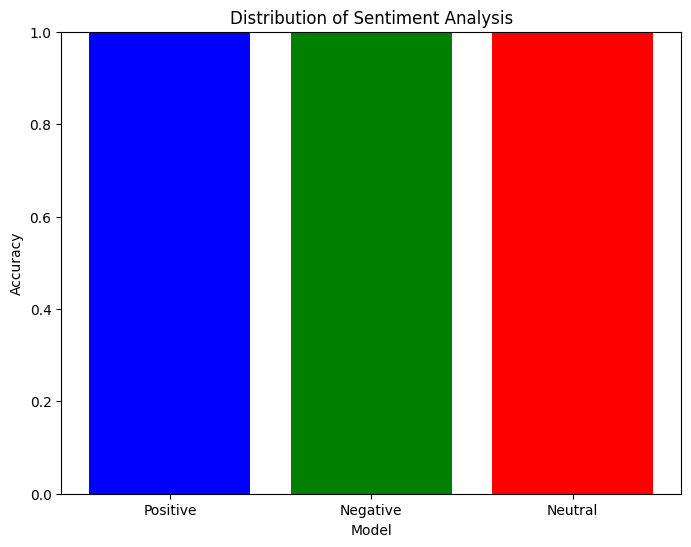

In [14]:
models = ['Positive', 'Negative', 'Neutral']
accuracies = [75.1,11.8, 13.1]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Distribution of Sentiment Analysis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.show()